In [29]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from itertools import product
import zlib
import sys

# Entropy of a spin array

In this exercise you will examine the change in entropy as the system equillibrate.

**This week we will compute the entropy using the connection to information theory.**

All you need to do this week is to **change the Entropy calculation in the last part of HW 2 according to the example** given to you.

*There is no need to implement all the functions again, you can use the solution to HW2.*

## Part 1 - Magnetization Distribution

### Task 1.1 - generate all possible configurations for an array of length $l$

Hint: Use a cartesian product via itertools library [itertools.product()] for the convenience

In [30]:
def generate_all_configurations(length):
    '''
    Description:
    This function gets an integer which corresponds to length of the array we want to generate.
    Then the function generates all the possible configurations of a spins array.

    Inputs:
    length - the length of the array 
    
    Outputs: 
    all_configurations - the array of the spins

    Example:
    input: length = 2
    output: spin_array = [[-0.5 -0.5]
                          [-0.5  0.5]
                          [ 0.5 -0.5]
                          [ 0.5  0.5]]
    '''
    spins = [-1/2,1/2]
    all_configurations = np.array(list(product(spins, repeat=length)))
    return all_configurations

length = 2 ## Don't go higher than length=20
all_configurations = generate_all_configurations(length)
print(all_configurations)

[[-0.5 -0.5]
 [-0.5  0.5]
 [ 0.5 -0.5]
 [ 0.5  0.5]]


### Task 1.2 - Calculate the magnetization for each possible microstate

Hint: use can use the function from HW 1

In [31]:
def calculate_total_magnetization(spins_array):
    '''
    Description:
    This function gets a spins array and calculates the magnetization (sum of all spins).

    Inputs:
    spins_array = 1D array of spins like the one generated in task 1.1
    
    Outputs: 
    magnetization - the magnetization of the array

    Example:
    input: spins_array = [-0.5  0.5 -0.5 -0.5  0.5]
    output: magnetization = -0.5
    '''
    magnetization = np.sum(spins_array)
    return magnetization

length = 6
all_configuations = generate_all_configurations(length)
specific_array = all_configuations[0]
magnetization = calculate_total_magnetization(specific_array)
print(magnetization)

-3.0


### Task 1.3 - Create a probability density function for the magnetization in the steady state

A function that returns the magnetization probability density for an array in steady state (all configurations are equally probable) 

Plot the pdf

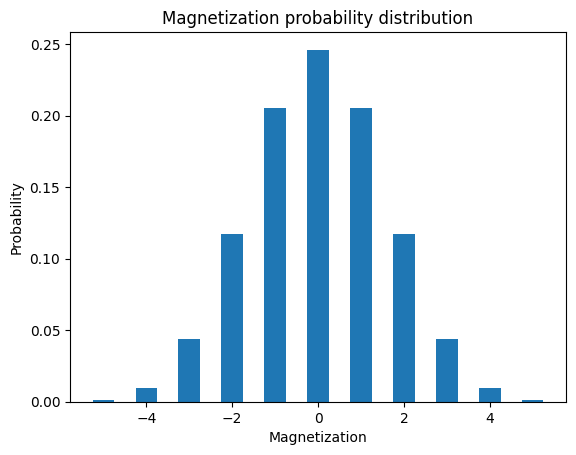

In [32]:
def steady_state_magnetization_pdf(length):
    '''
    Description:
    This function gets a length and return the magnetization probability density afor an array in the given length.
    This function return a dictonary that connect the magnetization and the probability in the steady state (all configs are equally probable)

    Inputs:
    length: The length of the array

    Outputs: 
    pdf - dictonary that connect the magnetization and the probability 

    Example:
    inputs: length = 4

    output: pdf = {np.float64(-2.0): np.float64(0.0625),
                   np.float64(-1.0): np.float64(0.25),   
                   np.float64(0.0): np.float64(0.375),
                   np.float64(1.0): np.float64(0.25), 
                   np.float64(2.0): np.float64(0.0625)}
    '''
    all_configuations = generate_all_configurations(length)
    magnetizations = []
    pdf = {}
    for config in all_configuations:
        m = calculate_total_magnetization(config)
        magnetizations.append(m)
    total_magnetizations = len(magnetizations)
    magnetization_values, counts = np.unique_counts(magnetizations)
    for magnetization, m_count in zip(magnetization_values, counts):
        pdf[magnetization] = m_count/total_magnetizations
    return pdf

length = 10
pdf = steady_state_magnetization_pdf(length)

### plot the probability distribution of an array of a specified length###
plt.bar(pdf.keys(), pdf.values() ,width=0.5)
plt.title('Magnetization probability distribution')
plt.xlabel('Magnetization')
plt.ylabel('Probability')
plt.show()

## Part 2 - Entropy change in system equilibration

Now that we got the magnetization pdf we can calculate the Entropy of a configuaration. If we do for each step in time we can see how the Entropy changes. 

### Task 2.1 - generate a spin up 1D array of length $l$

Same as HW1

In [33]:
def generate_spin_up_array(length):
    '''
    Description:
    This function generates an array of only spin up. This will be used later to create our initial configuration for the time evolution of the system.

    Inputs:
    length - the length of the generated array
    
    Outputs: 
    spins_array - spin up array

    Example:
    input: length = 6
    output: spins_array = [0.5,0.5,0.5,0.5,0.5,0.5]
    '''
    spins_array = np.array([0.5]*length)
    return spins_array

print(generate_spin_up_array(5))

[0.5 0.5 0.5 0.5 0.5]


### Task 2.2 - generate $N$ 1d spin up arrays of size $l$ and store them in a Matrix

Hint: use the function created in task 2.1 and the function from HW 1.

In [34]:
def generate_N_1d_spin_up_arrays(N, length):
    '''
    Description:
    This function gets 2 number which corresponds to length of the array we want to generate and the number of arrays.
    Then the function generates N spin up arrays of a certain length and stores them in a matrix.

    Inputs:
    N - number of arrays to generate
    length - the length of the array 
    
    Outputs: 
    matrix - a matrix that contains all the arrays. Each row is a different array. 
    ***For convenience return the matrix as a numpy array****

    Example:
    input: length = 5
           N = 3 
    output: matrix = [[0.5 0.5 0.5 0.5 0.5]
                      [0.5 0.5 0.5 0.5 0.5]
                      [0.5 0.5 0.5 0.5 0.5]]
    '''
    matrix = []
    for _ in range(N):
        spins_array = generate_spin_up_array(length)
        matrix.append(spins_array)
    return np.array(matrix)

length = 6
N = 3
matrix = generate_N_1d_spin_up_arrays(N, length)
print(matrix)

[[0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5]]


### Task 2.3 - Flip a random spin in the array

This is the time evolution for a given array.

Same as HW1

In [35]:
def flip_spin_randomly(array):
    '''
    Description:
    This function flips 1 spin of a given array. This will be used as our simulation step (time evolution).

    Inputs:
    array - 1D spins array
    
    Outputs: 
    array_copy - a copy of the spins array but with 1 randomly fliped spin

    Example:
    input: array = [-0.5,0.5,-0.5,-0.5,-0.5,0.5]
    output: array_copy = [-0.5,0.5,-0.5,-0.5,0.5,0.5]
    '''
    array_copy = np.copy(array)
    index = np.random.choice(range(len(array_copy)), 1)[0]
    array_copy[index] = -1*array_copy[index]
    return(array_copy)

spins_array = generate_spin_up_array(5)
flipped_array = flip_spin_randomly(spins_array)
print(spins_array , flipped_array)

[0.5 0.5 0.5 0.5 0.5] [ 0.5 -0.5  0.5  0.5  0.5]


### Task 2.4 - calculate the average magnetization of $N$ 1D spin arrays

Same as HW1

In [36]:
def calculate_average_magnetization(spins_matrix):
    '''
    Description:
    This function gets a spins matrix (N arrays of length l) and calculates the average magnetization. (average magnetization per array).

    Inputs:
    spins_array = 2D array of spins like the one generated in task 1.2
    
    Outputs: 
    average magnetization - the average magnetization per array

    Example:
    input: spins_matrix = [[ 0.5  0.5 -0.5 -0.5  0.5  0.5]
                           [-0.5 -0.5 -0.5 -0.5  0.5  0.5]
                           [-0.5 -0.5 -0.5  0.5 -0.5 -0.5]]
    output: average_magnetization = -0.333
    '''
    magnetizations = np.sum(spins_matrix, axis=1)
    average_magnetization = np.mean(magnetizations)
    return average_magnetization

length = 6
N = 100
spins_matrix = generate_N_1d_spin_up_arrays(N, length)
average_magnetization = calculate_average_magnetization(spins_matrix)
print(average_magnetization)

3.0


### Task 2.5 - Flip a random spin for each array in a spin matrix

This is the time evolution for an ensemble.

In [37]:
def flip_spin_randomly_ensemble(spins_matrix):
    '''
    Description:
    This function with 50% chance flips 1 spin for each array in a given matrix (ensemble). This will be used as our simulation step.

    Inputs:
    spins_matrix - 1D spins array
    
    Outputs: 
    flipped_matrix - a copy of the spins matrix but with 1 randomly fliped spin in each row

    Example:
    input: spins_matrix = [[0.5 0.5]
                           [0.5 0.5]]
    output: flipped_matrix = [[-0.5  0.5]
                              [ 0.5 -0.5]]
    '''
    flipped_matrix = []
    spins_matrix_copy = np.copy(spins_matrix)
    for array in spins_matrix_copy:
        index = np.random.choice(range(len(array)), 1)[0]
        multiplier = np.random.choice([-1,1], 1)[0]
        array[index] = multiplier*array[index]
        flipped_matrix.append(array)
    return(np.array(flipped_matrix))

N = 2
length = 2
spins_matrix = generate_N_1d_spin_up_arrays(N, length)
flipped_matrix = flip_spin_randomly_ensemble(spins_matrix)
flipped_matrix = flip_spin_randomly_ensemble(flipped_matrix)
flipped_matrix = flip_spin_randomly_ensemble(flipped_matrix)

print(spins_matrix ,'\n' , flipped_matrix)

[[0.5 0.5]
 [0.5 0.5]] 
 [[ 0.5 -0.5]
 [ 0.5  0.5]]


### Task 2.6 - Create Magnetization Probability Density function of an ensemble

For a given ensemble of arrays calculate the magnetization for each array and create a Probability Density function (for a given magnetization returns the probability)

**This function returns a dictonary that connects between the magnetization and the probability.**

Hint: Similar to Task 1.3 but no need to look at all possible comfiguration but the configuration given in the ensemble

[[-0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5]
 [-0.5 -0.5  0.5  0.5]
 [ 0.5  0.5 -0.5  0.5]]
{np.float64(0.0): np.float64(0.2), np.float64(1.0): np.float64(0.6), np.float64(2.0): np.float64(0.2)}


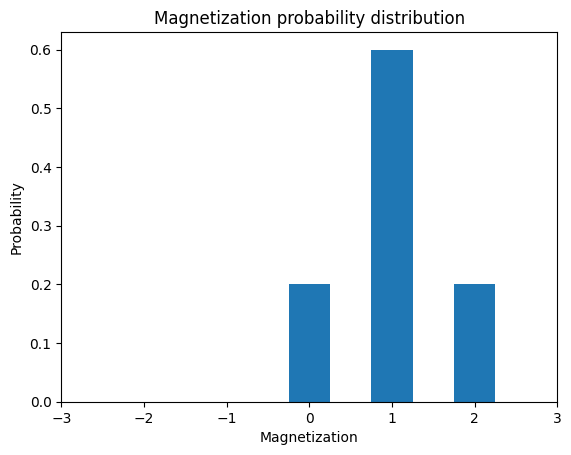

In [38]:
def ensemble_magnetization_pdf(ensemble):
    '''
    Description:
    This function gets an ensemble (spins matrix) and returns the pdf (dictonary that connect magnetization and probability).

    Inputs:
    ensemble: spins matrix

    Outputs: 
    pdf - the magnetization probability density function of the ensemble 

    Example:
    inputs: ensemble = [[-0.5  0.5  0.5  0.5]
                        [ 0.5  0.5  0.5  0.5]
                        [ 0.5 -0.5  0.5  0.5]
                        [ 0.5 -0.5  0.5  0.5]
                        [ 0.5  0.5  0.5  0.5]]
                        
    output: pdf = {np.float64(1.0): np.float64(0.6),
                   np.float64(2.0): np.float64(0.4)}
    '''
    magnetizations = []
    pdf = {}
    for config in ensemble:
        m = calculate_total_magnetization(config)
        magnetizations.append(m)
    total_magnetizations = len(magnetizations)
    magnetization_values, counts = np.unique_counts(magnetizations)
    for magnetization, m_count in zip(magnetization_values, counts):
        pdf[magnetization] = m_count/total_magnetizations
    return pdf

N = 5
length = 4
ensemble = generate_N_1d_spin_up_arrays(N, length)
ensemble = flip_spin_randomly_ensemble(ensemble)
ensemble = flip_spin_randomly_ensemble(ensemble)
print(ensemble)

pdf = ensemble_magnetization_pdf(ensemble)
print(pdf)
### plot the probability distribution of an array of a specified length###
plt.bar(pdf.keys(), pdf.values() ,width=0.5)
plt.xlim(-length/2-1, length/2+1)
plt.title('Magnetization probability distribution')
plt.xlabel('Magnetization')
plt.ylabel('Probability')
plt.show()

### Task 2.7 - Calculate the entropy of a given ensemble based on its magnetization pdf

In [39]:
def calculate_ensemble_entropy(pdf):
    '''
    Description:
    This function calculates the entropy of a given ensemble based on the magnetization PDF and Shanon Entropy
    Hint - Use the Shanon Entropy formula

    Inputs:
    pdf - magnetization pdf

    Outputs: 
    entropy - the entropy of the system

    Example:
    input: pdf = {np.float64(0.5): np.float64(0.6666666666666666),
                  np.float64(1.5): np.float64(0.3333333333333333)}
                
    output: entropy = 0.6365141682948128
    '''
    probabilities = pdf.values()
    entropy = 0
    for prob in probabilities:
        entropy += -prob*np.log(prob)
    return entropy

N = 10
length = 5
ensemble = generate_N_1d_spin_up_arrays(N, length)
ensemble = flip_spin_randomly_ensemble(ensemble)
ensemble = flip_spin_randomly_ensemble(ensemble)

pdf = ensemble_magnetization_pdf(ensemble)
entropy = calculate_ensemble_entropy(pdf) 
print(entropy)

0.639031859650177


### Task 2.8 - Ensemble Time Evolution 

Here we will implement the ensemble time evolution. 

The system start at an initial configuration (here we will choose a spin up only array as our initial configuration), for each step of the simulation we will change the system using the function defined in Task 2.5

In addition plot the magnetization probability density at 4 different timesteps (include beginning and end)

Use the function we gave - plot_pdfs - Note that this function gets a list of pdfs and a list of the time that they were taken

### This week you'll calculate the Entropy from the size of the compressed object

Use the example given to you and change the way you calculate entropy according to it

Link to paper - https://arxiv.org/abs/1709.10164

In [40]:
def plot_pdfs(pdfs, times):
    fig, ax = plt.subplots(2,2, figsize=(9,6))
    plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Adjust spacing here
    axs = ax.ravel()
    for ax, pdf, time in zip(axs, pdfs, times):
        ax.bar(pdf.keys(), pdf.values() ,width=0.5)
        ax.set_xlabel('Magnetization')
        ax.set_ylabel('Probability')
        ax.set_title(f'Magnetization probability distribution @ T={time}',fontsize='8')
    fig.suptitle('Pdfs at different times')
    plt.show()

def plot_magnetization_and_entropy(magnetization_per_time, entropy_per_time, time_array ,length):
    fig, ax1 = plt.subplots()

    #Plot the magnetization over time and the average magnetization
    color = 'tab:red'
    ax1.plot(time_array, magnetization_per_time, c=color)
    ax1.axhline(np.mean(magnetization_per_time), c='Orange', linestyle='--', label='Mean')
    ax1.set_xlabel("Time [s]")
    ax1.set_ylabel("Magnetization", c=color)

    #Plot the entropy over time and the entropy of the ground state (assume even number of spins)
    color = 'tab:blue'
    ax2 = ax1.twinx()
    ax2.axhline(calculate_ensemble_entropy(steady_state_magnetization_pdf(length)), c='Green', linestyle='--', label='Entropy on Ground State')
    ax2.plot(time_array, entropy_per_time,c=color)
    ax2.set_ylabel("Entropy",c=color)

    fig.suptitle("Magnetization and Entropy by Time")
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=2) 
    plt.show()

In [41]:
### Get Size Of Object Example ###
l = np.array(['111','0101'])
l_str = str(l)
a = bytes(l_str,'utf-8')
b = zlib.compress(a)
l_size = sys.getsizeof(b) 
print(f'The size of {l_str} is {l_size}')


The size of ['111' '0101'] is 55


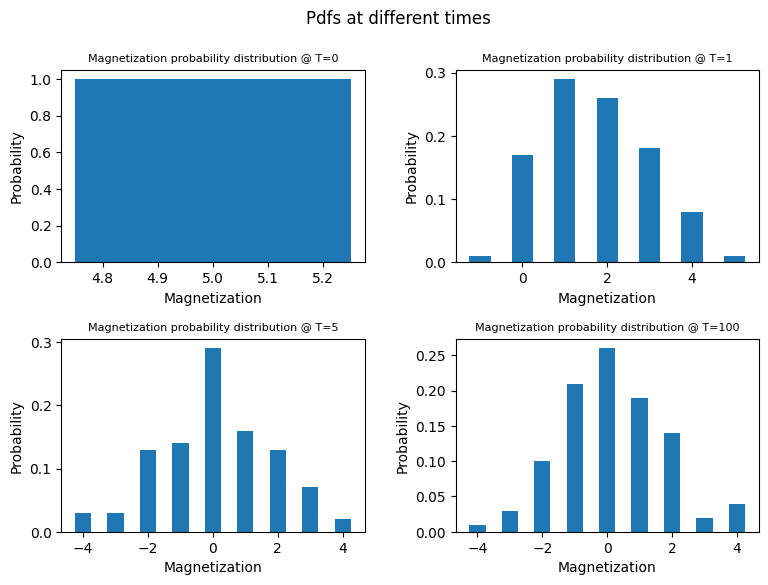

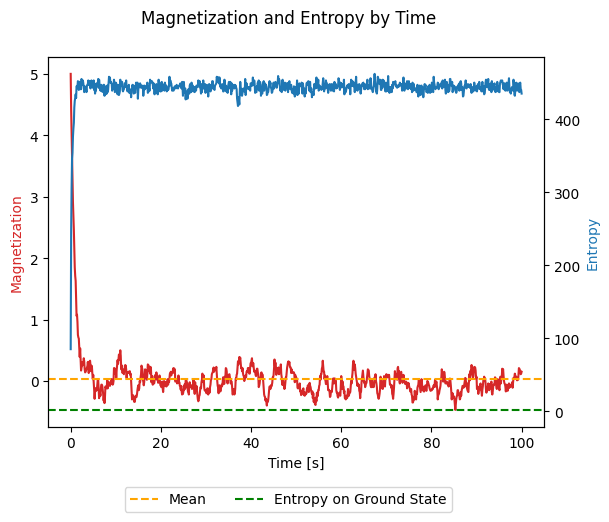

In [42]:
# Set simulation parameters (Time ,unit step and array length i.e time = 100 sec, dt = 1 sec, length = 10, N=100 ...)
simulation_time = 100
dt = 0.1
length = 10
N = 100

# Calculate the amount of steps
steps = int(simulation_time/dt)

#Create an array of all the timesteps of the simulation
time_array = np.arange(steps+1)

#Generate the initial ensemble (N 1d spin up arrays)
spins_matrix = generate_N_1d_spin_up_arrays(N, length)

#Advance the system in time and for each new configuration calculate and save the magnetization and entropy.
magnetization_per_time = []
entropy_per_time = []
pdfs = []
times = [0, 1, 5, simulation_time]
for t in time_array:
    magnetization_per_time.append(calculate_average_magnetization(spins_matrix))
    pdf = ensemble_magnetization_pdf(spins_matrix)
    if t*dt in times:
        pdfs.append(pdf)
    
    spins_matrix_str = str(spins_matrix)
    spins_matrix_bytes =bytes(spins_matrix_str, 'utf-8')
    spins_matrix_compressed = zlib.compress(spins_matrix_bytes)
    entropy = sys.getsizeof(spins_matrix_compressed)
    entropy_per_time.append(entropy)
    spins_matrix = flip_spin_randomly_ensemble(spins_matrix)

plot_pdfs(pdfs, times)
plot_magnetization_and_entropy(magnetization_per_time, entropy_per_time, dt*time_array, length)
